In [1]:
import networkx as nx
import numpy as np
from AmigoOculto import simulate, get_emails, simulate_no_cycle
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

%matplotlib inline

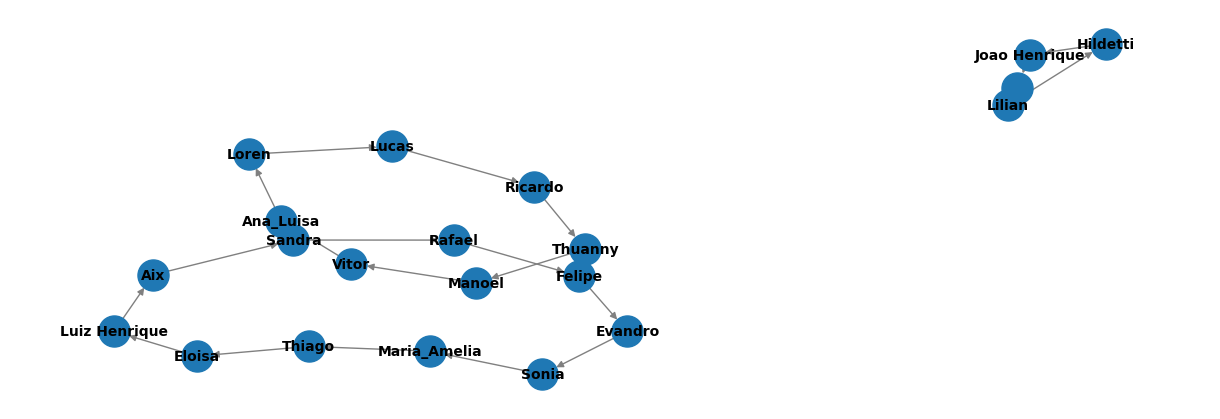

In [2]:
my_list = get_emails()
result = simulate(my_list)
# result = simulate_no_cycle(my_list)
G = nx.DiGraph()

for src, tgt in result.items():
    G.add_node(src[0], label=src[0])
    G.add_node(tgt[0], label=tgt[0])
    G.add_edge(src[0], tgt[0])

plt.figure(figsize=(12, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color='black', font_weight='bold', edge_color='gray')

plt.show()

In [3]:
nx.number_connected_components(G.to_undirected())

3

In [102]:
connected_flag = 0 if nx.number_connected_components(G.to_undirected()) == 1 else 1
connected_flag

1

In [72]:
def build_graph(my_list):
    G = nx.DiGraph()
    for src, tgt in my_list.items():
        G.add_node(src[0], label=src[0])
        G.add_node(tgt[0], label=tgt[0])
        G.add_edge(src[0], tgt[0])
    return G

N = int(5e5)
connected_counter = 0

for _ in range(N):
    my_list = get_emails()
    result = simulate(my_list)
    G = build_graph(result)
    connected_flag = 1 if nx.number_connected_components(G.to_undirected()) == 1 else 0
    connected_counter += connected_flag

connected_probability = connected_counter/N
print(f"Probabilidade de ter triangulação: {(1 - connected_probability):.3f}")

Probabilidade de ter triangulação: 0.865


In [202]:
print(f"Probabilidade de ter apenas 1 componente: {connected_probability:.3f}")

Probabilidade de ter apenas 1 componente: 0.135


In [86]:
N = int(5e5)
number_of_components = []
my_list = get_emails()
for _ in range(N):
    result = simulate(my_list)
    G = build_graph(result)
    number_of_components.append(nx.number_connected_components(G.to_undirected()))

number_of_components = np.array(number_of_components)

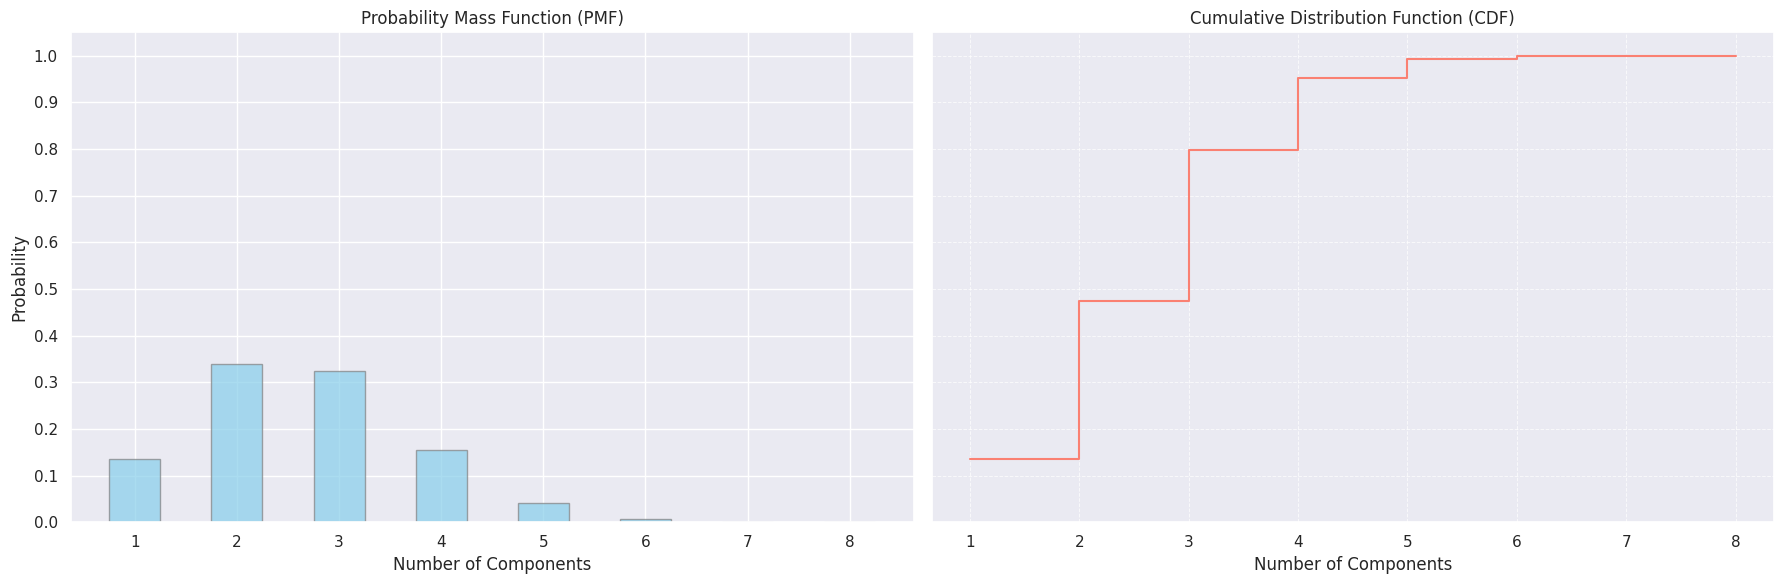

In [110]:
values, counts = np.unique(number_of_components, return_counts=True)
pmf = counts / counts.sum()

# Cumulative Distribution (CDF)
cdf = np.cumsum(pmf)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# PMF
axes[0].bar(values, pmf, color='skyblue', alpha=0.7, edgecolor='grey', width=0.5)
axes[0].set_title("Probability Mass Function (PMF)")
axes[0].set_xlabel("Number of Components")
axes[0].set_ylabel("Probability")

# CDF
axes[1].step(values, cdf, where='post', color='salmon', linewidth=1.5)
axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].set_xlabel("Number of Components")
axes[1].grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)


yticks = np.arange(0, 1.05, 0.1) 
for ax in axes:
    ax.set_yticks(yticks)

plt.tight_layout()
plt.show()

In [166]:
def calculate_cycle_probability(my_list, N = int(1e5)):
    connected_counter = 0
    for _ in range(N):
        result = simulate(my_list)
        G = build_graph(result)
        connected_flag = 1 if nx.number_connected_components(G.to_undirected()) == 1 else 0
        connected_counter += connected_flag

    connected_probability = connected_counter/N
    return connected_probability

In [169]:
my_list = get_emails()
n_participants = len(my_list)
probabilities = [calculate_cycle_probability(my_list[:i]) for i in range(4, n_participants+1)]
probabilities

[0.66691,
 0.54577,
 0.45229,
 0.38953,
 0.33954,
 0.30179,
 0.27147,
 0.24809,
 0.22571,
 0.20855,
 0.1934,
 0.18271,
 0.16977,
 0.15902,
 0.15077,
 0.14312,
 0.13664,
 0.13064,
 0.12453,
 0.11809,
 0.1136,
 0.11015,
 0.10472,
 0.10006,
 0.0963,
 0.0933,
 0.09011,
 0.08896,
 0.08673,
 0.08134,
 0.07973,
 0.07858,
 0.07545]

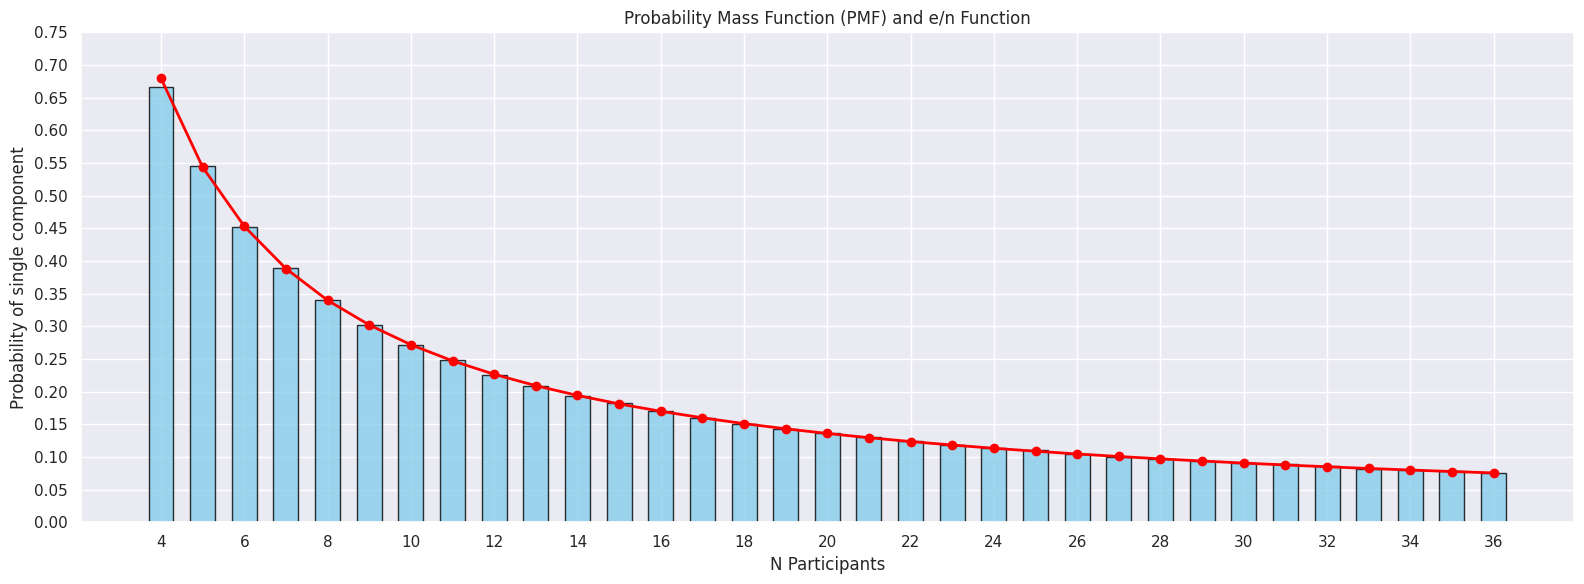

In [220]:
x_values = list(range(4, 37))
e = np.exp(1)  # Euler's number
e_over_n = [e / n for n in x_values]


plt.figure(figsize=(16, 6))
bar_width = 0.6
plt.bar(x_values, probabilities, color='skyblue', alpha=0.8, edgecolor='black', width=bar_width)
plt.plot(x_values, e_over_n, color='red', linestyle='-', marker='o', label="e/n", linewidth=2)


plt.title("Probability Mass Function (PMF) and e/n Function")
plt.xlabel("N Participants")
plt.ylabel("Probability of single component")


y_ticks = np.arange(0, 0.8, 0.05) 
plt.yticks(y_ticks)
x_ticks = np.arange(4, 38, 2) 
plt.xticks(x_ticks)

plt.tight_layout()
plt.show()

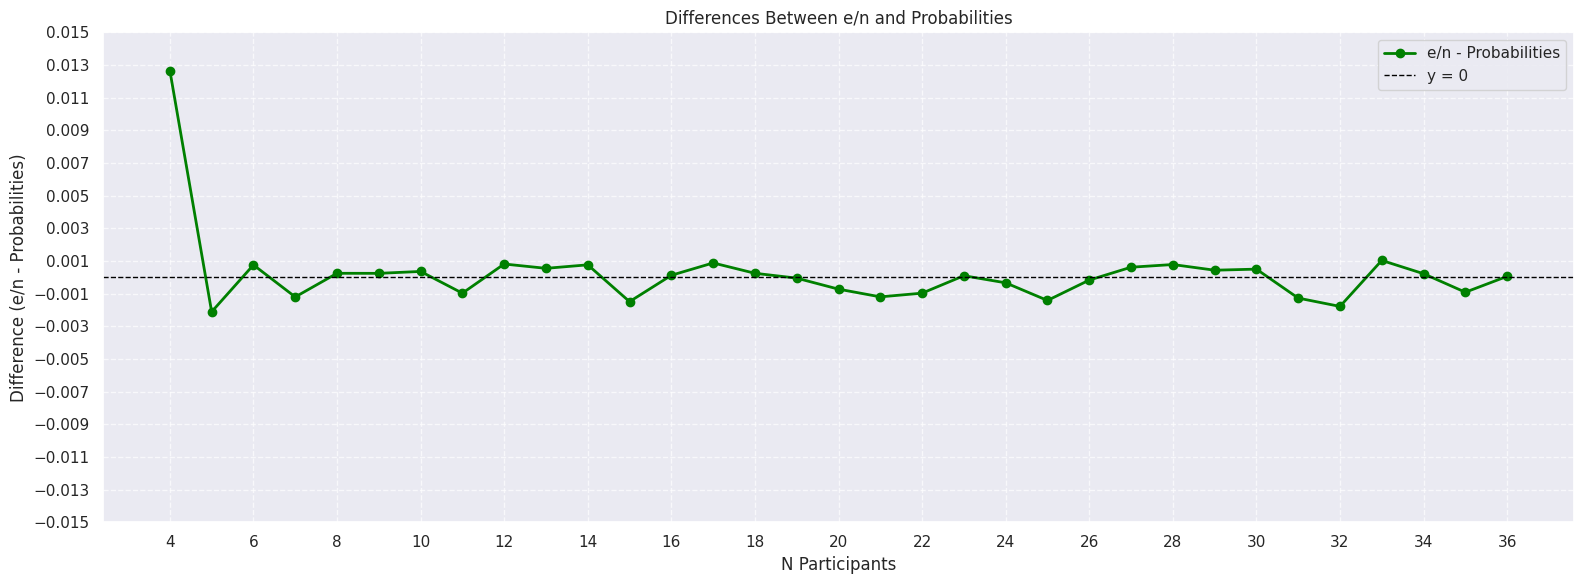

In [233]:
differences = np.array(e_over_n) - np.array(probabilities)

plt.figure(figsize=(16, 6))

plt.plot(x_values, differences, color='green', linestyle='-', marker='o', linewidth=2, label="e/n - Probabilities")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label="y = 0")

plt.title("Differences Between e/n and Probabilities")
plt.xlabel("N Participants")
plt.ylabel("Difference (e/n - Probabilities)")

y_ticks = np.arange(-0.015, 0.017, 0.002)
plt.yticks(y_ticks)
x_ticks = np.arange(4, 38, 2)
plt.xticks(x_ticks)

plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
